In [65]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

In [66]:
df = pd.read_csv('./bunjou_cleaned.csv')

label_columns = ['土地権利']

for val in label_columns:
    le = LabelEncoder()
    le.fit(df[val])
    print(le.classes_)
    df[val] = le.transform(df[val])

for val in label_columns:
    df_oh = pd.get_dummies(df[val])
    df = pd.concat([df, df_oh], axis=1)

['定期借地権（地上権）' '定期借地権（賃借権）' '所有権' '旧法地上権' '旧法賃借権' '普通地上権' '普通賃借権']


In [67]:
df_x = df.drop('価格', axis=1)
df_y = df['価格']
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.25, shuffle=True)

In [68]:
regr = RandomForestRegressor(max_depth=20, random_state=0)
regr.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

0.8523850170246549


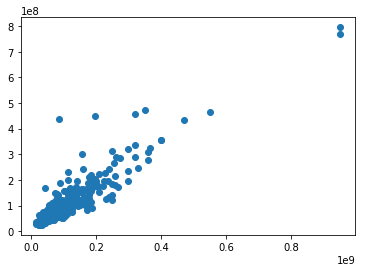

In [70]:
y_pred = regr.predict(x_test)
print(r2_score(y_test, y_pred))
plt.scatter(y_test, y_pred)
vals = np.array()

In [96]:
otoku = []
for i in range(0, len(y_pred)):
    if y_pred[i] - y_test.values[i] >= 20000000 and y_test.values[i] <= 50000000:
        otoku.append(i)

In [97]:
len(otoku)
otoku

[48,
 190,
 231,
 233,
 324,
 342,
 357,
 430,
 499,
 522,
 538,
 652,
 744,
 790,
 803,
 867,
 898,
 940,
 969,
 978]

In [89]:
y_test

2373     66800000.0
3032     91800000.0
3652     24800000.0
2647     73800000.0
2940     86800000.0
477      36800000.0
3318    128000000.0
786      39800000.0
2866     82800000.0
4045     99000000.0
2758     77500000.0
727      39800000.0
3891     65800000.0
2513     69800000.0
4190    274000000.0
425      35800000.0
781      39800000.0
3956     76800000.0
1813     54800000.0
3490    180000000.0
665      38900000.0
3959     77800000.0
2062     59800000.0
4022     89800000.0
3333    128000000.0
3277    120000000.0
2622     72800000.0
1715     52800000.0
469      36800000.0
794      39800000.0
           ...     
2669     74800000.0
2716     75000000.0
2443     68800000.0
2718     75800000.0
2009     58800000.0
3438    158000000.0
1727     52800000.0
4081    118000000.0
1934     56800000.0
78       26900000.0
2282     64700000.0
1109     44480000.0
1733     52800000.0
3281    120000000.0
2665     74800000.0
2777     78500000.0
1146     44800000.0
2040     59300000.0
2347     65800000.0
